In [1]:
# load in required packages
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import pickle

In [105]:
# first for aggregate trip distance
city='Berlin'
fp='../outputs/ML_Results/shap/dist_agg/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance=pickle.load(f)

importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
importance['Region']=city
importance_all=importance.copy()

for city in ['Paris','Madrid','Wien','Germany_other','France_other']:
    print(city)
    fp='../outputs/ML_Results/shap/dist_agg/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)

    fp='../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance=pickle.load(f)

    importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
    importance['Region']=city
    importance_all=pd.concat([importance_all,importance])

Paris
Madrid
Wien
Germany_other
France_other


In [106]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all

,column_name,shap_importance,cont_pc,Region
1,DistCenter_res,693.02533,56.501919,Berlin
3,UrbBuildDensity_res,166.666992,13.588255,Berlin
4,IntersecDensity_res,141.401627,11.528386,Berlin
10,Age,80.63929,6.574471,Berlin
9,Commute_Trip,75.871292,6.185739,Berlin
...,...,...,...,...
5,street_length_res,45.943977,2.450717,"France, other"
10,Age,38.349209,2.045602,"France, other"
7,bike_lane_share_res,32.669956,1.742662,"France, other"
6,LU_UrbFab_res,22.530243,1.201795,"France, other"


In [107]:
# for distance agg new
col_dict= {'DistCenter_res':'Dist. to city center','IntersecDensity_res':'Instersection density','street_length_res':'Avg. street length','Commute_Trip':'Commuting Trip',
       'UrbBuildDensity_res':'Built-up density','UrbPopDensity_res':'Population density', 'DistSubcenter_res':'Dist. to subcenter','Age':'Age',
       'LU_UrbFab_res':'Urban fab. land-use share', 'LU_Comm_res':'Commercial land-use share',
       'HHSize':'Household size','maxAgeHH':'Max householder age','InEmployment':'Employed'}

importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [108]:
importance_plot

,column_name,shap_importance,cont_pc,Region
1,Dist. to city center,693.02533,56.501919,Berlin
3,Built-up density,166.666992,13.588255,Berlin
4,Instersection density,141.401627,11.528386,Berlin
10,Age,80.63929,6.574471,Berlin
9,Commuting Trip,75.871292,6.185739,Berlin
...,...,...,...,...
5,Avg. street length,45.943977,2.450717,"France, other"
10,Age,38.349209,2.045602,"France, other"
7,NaN,32.669956,1.742662,"France, other"
6,Urban fab. land-use share,22.530243,1.201795,"France, other"


In [109]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Madrid,Paris,Wien
column_name,,,,,,
Dist. to city center,56.501919,28.319125,42.499854,40.96607,43.927272,27.602603
Commuting Trip,6.185739,17.40661,13.971555,9.803634,27.386832,14.64115
Instersection density,11.528386,24.514765,1.778637,9.75423,1.323849,6.699075
Built-up density,13.588255,4.642023,8.619772,3.023279,3.178754,15.422049
Population density,1.748206,9.877945,2.497424,11.528716,1.021539,18.239182
Dist. to subcenter,0.333063,7.163918,5.901255,12.496911,14.479969,4.201767
Urban fab. land-use share,0.383578,1.201795,10.203879,3.119799,0.969998,4.095342
Age,6.574471,2.045602,5.087349,1.33422,1.141242,0.710035
Commercial land-use share,0.325611,0.634837,5.399952,1.162759,2.280635,3.430396


Text(0.5, 1.0, 'Feature importance for trip distance, by city')

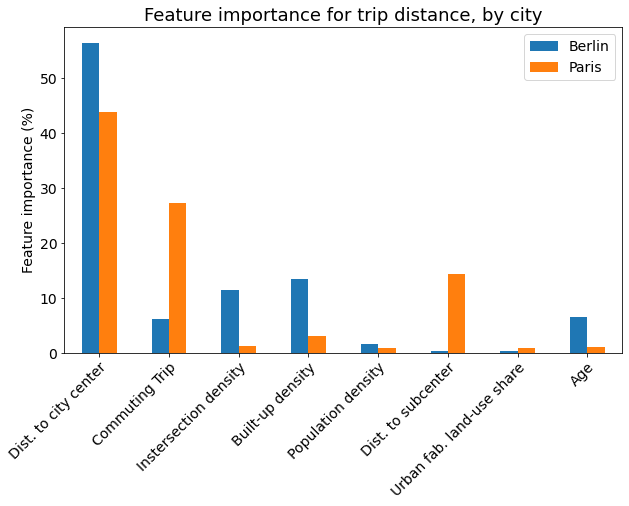

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
#ip.iloc[0:7,:].plot(kind='bar',ax=ax)
ip.loc[:,['Berlin','Paris']].iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('Feature importance for trip distance, by city',fontsize=18)

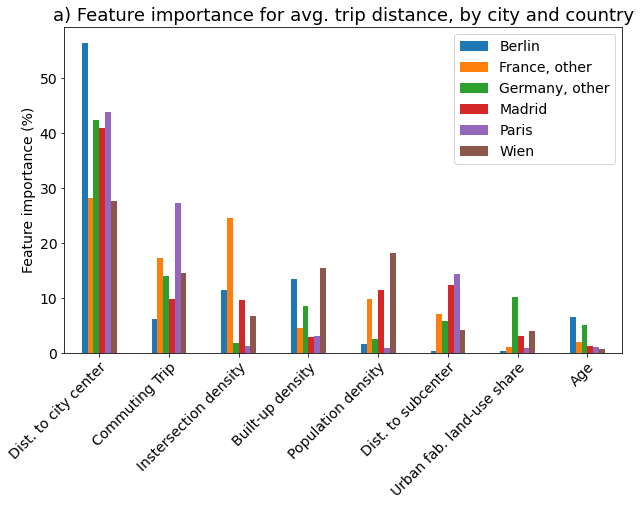

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('a) Feature importance for avg. trip distance, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_agg/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

In [3]:
cities_all=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien','France','Germany','Madrid_Wien','France_other','Germany_other']
countries=['Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','France','France','France','France','France','France','France','France','France','Spain','Austria','France','Germany','Spain_Austria','France','Germany']


In [9]:
#city='Berlin'
def mode_group_home(city):
    fp='../outputs/ML_Results/shap/mode_common/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/mode_common/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all


In [60]:
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(mode_group_home)
importance2

0                            column_name shap_impor...
1                            column_name shap_impor...
2                            column_name shap_impor...
3                            column_name shap_impor...
4                            column_name shap_impor...
5                            column_name shap_impor...
dtype: object

In [61]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3],importance2[4],importance2[5]])
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:20]

column_name
Trip_Distance                      226.012669
CarAvailable                        41.590504
Age                                 36.867504
DistCenter_origin                   21.262481
Sex                                 20.100595
UrbPopDensity_origin                19.516694
Trip_Purpose_Agg_Home↔Leisure       15.792563
bike_lane_share_origin              15.048798
DistSubcenter_origin                13.824347
UrbBuildDensity_origin              13.282795
HHSize                              13.005027
street_length_origin                12.668928
IntersecDensity_origin              12.338185
Trip_Purpose_Agg_Home↔Work          11.847962
LU_Comm_origin                      11.459398
LU_UrbFab_origin                    11.085791
Trip_Purpose_Agg_Home↔Companion     10.678272
Education_University                10.134657
Trip_Purpose_Agg_Home↔Shopping       7.315368
Trip_Purpose_Agg_Home↔School         6.232726
Name: cont_pc, dtype: object

In [62]:
col_dict= {'Trip_Distance':'Trip distance','CarAvailable':'Car Ownership','Age':'Age','DistCenter_origin':'Dist. to city center',
           'Sex':'Sex','UrbPopDensity_origin':'Population density','Trip_Purpose_Agg_Home↔Leisure':'Leisure Trip','bike_lane_share_origin':'Cycle lane share'}


In [63]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'


In [64]:
importance_plot=importance_all.copy()#.loc[importance_all['column_name'].isin(['Trip_Distance','CarAvailable','Sex','Age','DistCenter_origin','Trip_Purpose_Agg_Home↔Companion','UrbPopDensity_origin']),]
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [65]:

i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
i

Index(['Trip distance', 'Car Ownership', 'Age', 'Dist. to city center', 'Sex',
       'Population density', 'Leisure Trip', 'Cycle lane share'],
      dtype='object', name='column_name')

In [66]:
importance_plot.dropna(inplace=True)

In [67]:
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)

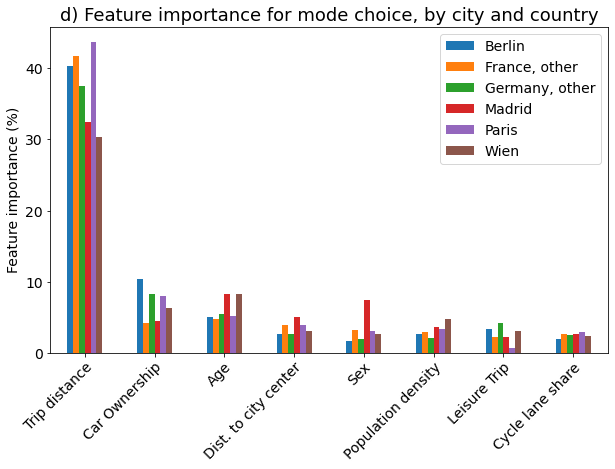

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ip.plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('d) Feature importance for mode choice, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/mode_common/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

In [70]:
# and car ownership
def carown(city):
    fp='../outputs/ML_Results/shap/carown/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/carown/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all

In [71]:
cities=pd.Series(['Berlin','Paris','France_other','Germany_other'])
importance2=cities.apply(carown)

In [72]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3]])
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:10]

column_name
IncomeDetailed_Numeric       102.940571
DistCenter                    53.348882
HHSize                        46.949268
maxAgeHH                      41.680566
UrbPopDensity                 17.473307
bike_lane_share               16.822778
UrbBuildDensity               14.990997
UniversityEducation           13.691567
HHType_simp_Single_Female     10.091224
InEmployment                   10.08643
Name: cont_pc, dtype: object

In [73]:
col_dict= {'DistCenter':'Dist. to city center','IntersecDensity':'Instersection density','bike_lane_share':'Cycle lane share',
       'UrbBuildDensity':'Built-up density','UrbPopDensity':'Population density','StreetsPerNode':'Streets per node','UniversityEducation':'University Educated',
       'IncomeDetailed_Numeric':'Income','HHSize':'Household size','maxAgeHH':'Max householder age','DistCenter':'Dist. to city center',
       'InEmployment':'Employed'}



In [74]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'

In [77]:
#importance_plot=importance_all.loc[importance_all['column_name'].isin(['IncomeDetailed_Numeric','DistCenter','HHSize','maxAgeHH','UrbPopDensity','StreetsPerNode','UniversityEducation','UrbBuildDensity']),]
importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)
importance_plot.dropna(inplace=True)

In [78]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index

ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Paris
column_name,,,,
Income,17.913161,28.714839,24.076627,32.235944
Dist. to city center,19.794199,7.313549,8.981512,17.259622
Household size,16.191377,3.004142,17.716614,10.037135
Max householder age,13.942151,7.162397,10.903129,9.672888
Population density,3.285727,5.208087,2.645694,6.333799
Cycle lane share,1.084799,4.679305,5.998325,5.060349
Built-up density,5.714537,4.86647,1.352388,3.057601
University Educated,2.940077,7.047693,2.06213,1.641668
Employed,1.372094,5.287394,2.481355,0.945588


In [79]:
from matplotlib.colors import ListedColormap
cmap=ListedColormap(['tab:blue','tab:orange','tab:green','tab:purple'])

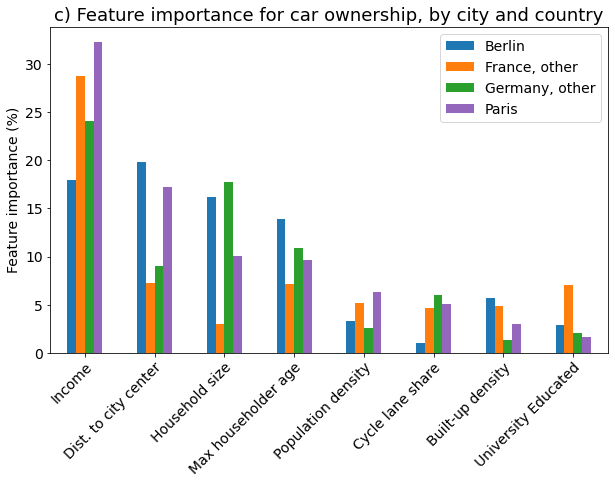

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax,cmap=cmap)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('c) Feature importance for car ownership, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/carown/FIcomp_cities_new.png',facecolor='w',dpi=65,bbox_inches='tight')

In [82]:
# and distance for commuting
def distcomm(city):
    fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(distcomm)

In [83]:
importance2

0                         column_name shap_importan...
1                         column_name shap_importan...
2                         column_name shap_importan...
3                         column_name shap_importan...
4                         column_name shap_importan...
5                         column_name shap_importan...
dtype: object

In [84]:
# first for aggregate trip distance
city='Berlin'
fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance=pickle.load(f)

importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
importance['Region']=city
importance_all=importance.copy()

for city in ['Paris','Madrid','Wien','Germany_other','France_other']:
    print(city)
    fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)

    fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance=pickle.load(f)

    importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
    importance['Region']=city
    importance_all=pd.concat([importance_all,importance])

Paris
Madrid
Wien
Germany_other
France_other


In [85]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all

,column_name,shap_importance,cont_pc,Region
6,DistCenter_res,2224.946533,43.537535,Berlin
1,Sex,518.683777,10.149553,Berlin
12,Trip_Time_AM_Rush,415.966003,8.139582,Berlin
16,Trip_Time_Nighttime Off-Peak,287.433136,5.624463,Berlin
4,UrbBuildDensity_res,230.579163,4.51195,Berlin
...,...,...,...,...
24,Occupation_Trainee,1.82225,0.032495,"France, other"
14,Trip_Time_Evening,1.243901,0.022182,"France, other"
28,Education_Unknown/Other,0.335567,0.005984,"France, other"
16,Trip_Time_Nighttime Off-Peak,0.334794,0.00597,"France, other"


In [95]:
importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).head(15)

column_name
DistCenter_res                  30.288728
Sex                              9.697849
Trip_Time_AM_Rush                7.238564
UrbPopDensity_res                4.972481
Age                              4.573417
UrbBuildDensity_res              4.295999
IntersecDensity_res              4.026928
Trip_Time_Nighttime Off-Peak     4.006785
bike_lane_share_res              3.673555
DistSubcenter_res                3.625820
Trip_Time_Lunch                  3.172179
Education_University             2.970359
LU_UrbFab_res                    2.697586
LU_Comm_res                      2.397870
HHSize                           2.088558
Name: cont_pc, dtype: float64

In [98]:
# for distance agg new
col_dict= {'DistCenter_res':'Dist. to city center','Sex':'Sex','Trip_Time_AM_Rush':'Time: Morning Rush Hour','UrbPopDensity_res':'Population density',
           'Age':'Age','UrbBuildDensity_res':'Built-up density','IntersecDensity_res':'Instersection density','Trip_Time_Nighttime Off-Peak':'Time: Night'}

importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [100]:
#importance_plot=importance_all.copy()
importance_plot.dropna(inplace=True)

In [101]:
importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).head(15)

column_name
Dist. to city center       30.288728
Sex                         9.697849
Time: Morning Rush Hour     7.238564
Population density          4.972481
Age                         4.573417
Built-up density            4.295999
Instersection density       4.026928
Time: Night                 4.006785
Name: cont_pc, dtype: float64

In [102]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Madrid,Paris,Wien
column_name,,,,,,
Dist. to city center,43.537535,29.225504,18.259215,34.571297,32.452098,23.68672
Sex,10.149553,8.708918,8.975823,8.251618,10.754266,11.346913
Time: Morning Rush Hour,8.139582,3.433013,26.881843,4.121425,0.260828,0.594691
Population density,2.036805,3.012853,2.147675,5.313019,1.632981,15.691553
Age,3.557143,5.038602,4.684722,4.855108,3.764711,5.540218
Built-up density,4.51195,1.65036,5.649937,5.009224,6.713835,2.24069
Instersection density,3.923178,7.770963,1.43199,4.58588,3.09619,3.353365
Time: Night,5.624463,0.00597,8.5685,0.437136,5.169525,4.235114


Text(0.5, 1.0, 'Feature importance for trip distance, by city')

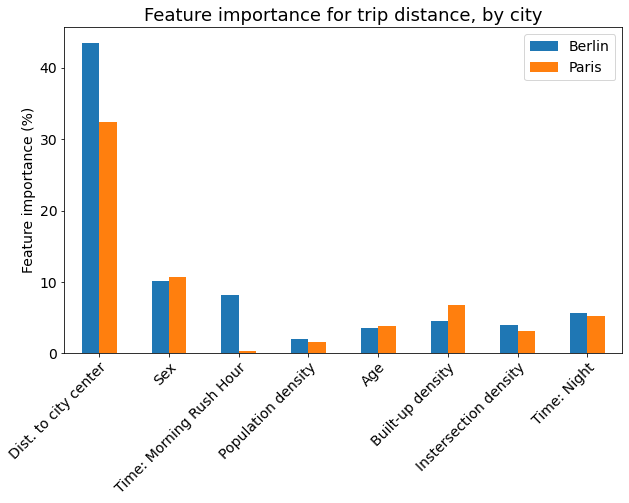

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
#ip.iloc[0:7,:].plot(kind='bar',ax=ax)
ip.loc[:,['Berlin','Paris']].iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('Feature importance for trip distance, by city',fontsize=18)

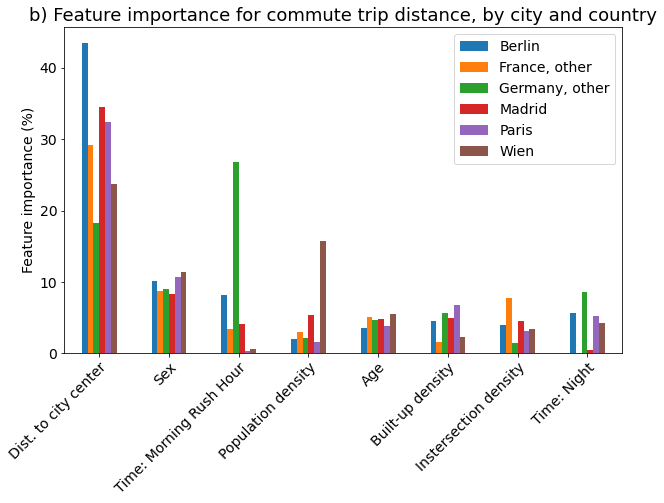

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('b) Feature importance for commute trip distance, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_commute/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')